# PHY480/905 Semester Project 

#### PHY 480/905 Semester Project
### &#9989; Dhiti Doddamreddy
#### &#9989; Last Updated on 4/9/24

# Comparative Analysis of Numerical Methods for Solving Electrostatic Potentials in  a Rectangular Pipe

##  Introduction 

In electrostatics, the potential at any point in space is related to the charge distribution within that region. This relationship is established by the Poisson equation. How does the known charge distribution within a rectangular pipe affect the electrostatic potential and electric field, and what can it tell us about the practical applications in electronics? Understanding the behavior of electrostatic potential within geometries has tangible implications for the functionality of electronics. By exploring how various charge distributions influence the potential and within a rectangular pipe as well as it's field, we can learn more about preicting how matireials will behave under different charging conditions, and can optimize the design of circuit components. Some other questions that are addresses are: In what ways do changes in the districution of charge alter the electric fields and how would charged particles move within these fields.

__Needs to be adjusted to new approach__

## Methodology:

Jacobi Method
$$
x_i^{(k+1)}=\frac{b_i-\sum_{j=1, j\ne i}^{n}a_{ij}x_j^{(k)}}{a_{ii}}
$$

Gauss-Seidel's Method

$$
x^{(k+1)}_i = \frac{1}{a_{ii}} \left(b_i - \sum_{j < i}a_{ij}x^{(k+1)}_j - \sum_{j > i}a_{ij}x^{(k)}_j \right),\quad i\in\{1,2,\ldots,n\}.
$$

### Explanation of Equations

### Part 1: Setting Up Problem
Let's first define the geometry within the rectangular pipe we are looking at.

Let's consider a rectangular pipe lying in the $xy$-plane, with lenght $L$ along the $x$-axis and height $H$ along the $y$-axis. The corner of our rectangular pipe, according to our axis, are located at coordinates: $(0,0)$, $(L,0)$, $(L,H)$, and $(0,H)$. 

Infinite in the Z direction



### Part 1.1: Defining the Problem Parameters in Code

In [1]:
import numpy as np

#Parameters
L = 1.0  # length of the pipe in the x-direction (meters)
H = 1.0  # height of the pipe in the y-direction (meters)

#Size of Mesh
Nx = 50  # number of grid points in the x-direction
Ny = 50  # number of grid points in the y-direction
dx = L / (Nx - 1)  # distance between grid points in the x-direction
dy = H / (Ny - 1)  # distance between grid points in the y-direction

### Part 1.2: Defining the Boundary Conditions
We must specificy the boundary conditions. To begin let's assuming these conditions:

Three of the sides are grounded, which means the potential $\Phi$ is set to zero on 3 sides of pipe representing grounded boundaries. This is how it would look mathematically:

- $\Phi(0,y) = 0$ for the left side
- $\Phi(L,y) = 0$ for the right side
- $\Phi(x,0) = 0$ for the bottom side

For the fourth side, the top side of the pipe, has a specific potential of $V_0$. This then means $\Phi(x,H) = V_0$

In [2]:
#Initializing potential array
potential = np.zeros((Ny, Nx))

#Boundary conditions
V_0 = 1

#Applying boundary contitions
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

__say something here__

Converged after 5498 iterations with a total error of 9.983273257282338e-05


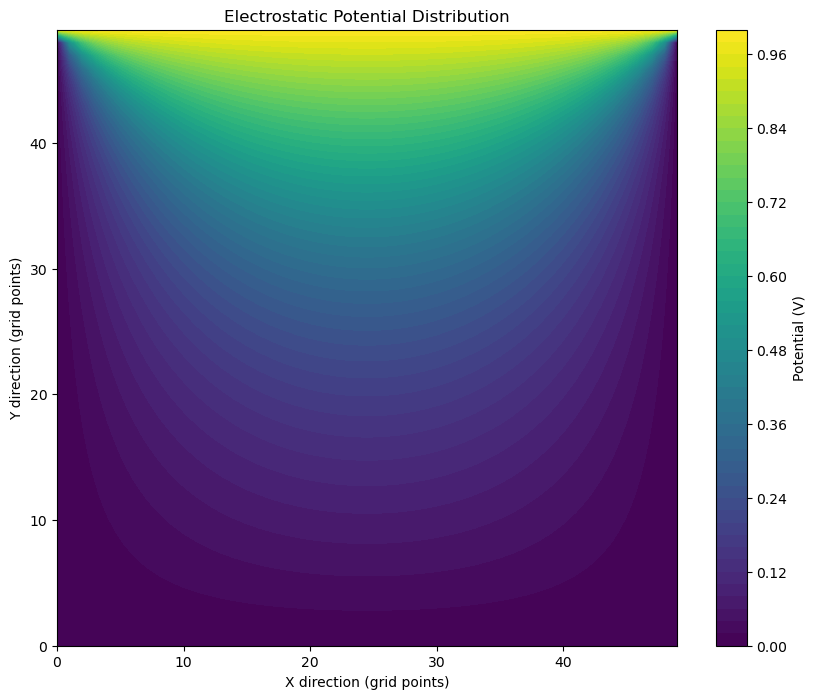

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    # Calculate the relative error
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def jacobi_rectangular_pipe(potential, kmax=10000, tol=1e-4):
    Ny, Nx = potential.shape
    for k in range(1, kmax + 1):
        old_potential = np.copy(potential)
        
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (old_potential[i+1, j] + old_potential[i-1, j] +
                                          old_potential[i, j+1] + old_potential[i, j-1])
        
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            print(f"Converged after {k} iterations with a total error of {err}")
            break
    else:
        print("Did not converge.")
        potential = None

    return potential

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

# Solve using the Jacobi method
solved_potential = jacobi_rectangular_pipe(potential)

# Visualization
if solved_potential is not None:
    plt.figure(figsize=(10, 8))
    plt.contourf(solved_potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential Distribution')
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()


Converged after 2935 iterations with a total error of 9.983557546476508e-05.


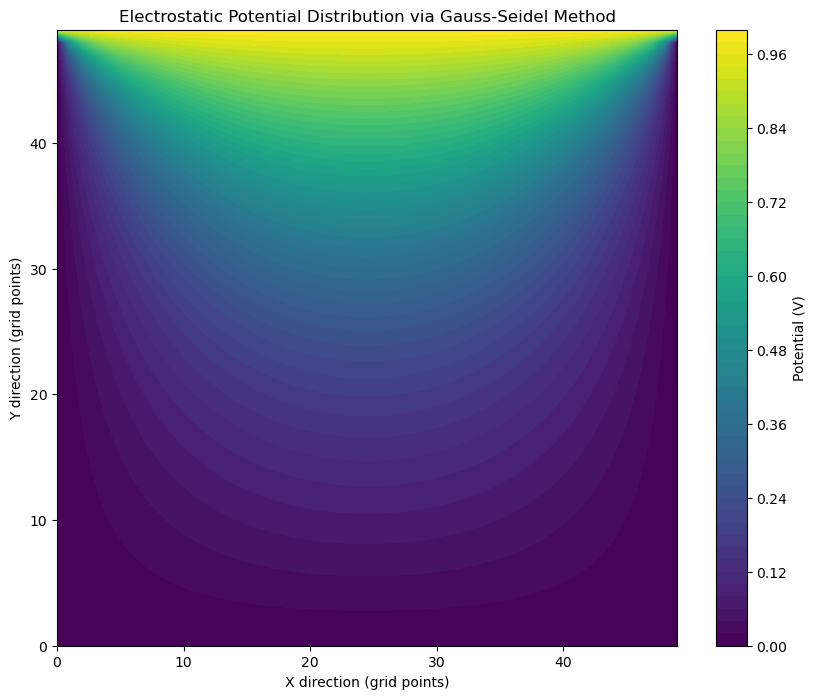

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    # Calculate the relative error
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def gauss_seidel(potential, kmax=10000, tol=1e-4):
    Ny, Nx = potential.shape
    for k in range(1, kmax + 1):
        old_potential = np.copy(potential)
        
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                          potential[i, j+1] + potential[i, j-1])
        
        # Calculate error using only interior points to check for convergence
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            print(f"Converged after {k} iterations with a total error of {err}.")
            return potential
    
    print("Did not converge.")
    return potential

def visualize_potential(potential, title='Electrostatic Potential Distribution via Gauss-Seidel Method'):
    """Plot the electrostatic potential distribution."""
    plt.figure(figsize=(10, 8))
    plt.contourf(potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title(title)
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

# Solve using the Gauss-Seidel method
solved_potential = gauss_seidel(potential)

# Visualization
visualize_potential(solved_potential)


In [ ]:
#Visualization Gauss-Seidel

Converged after 1072 iterations with a total error of 9.980197162992774e-05.


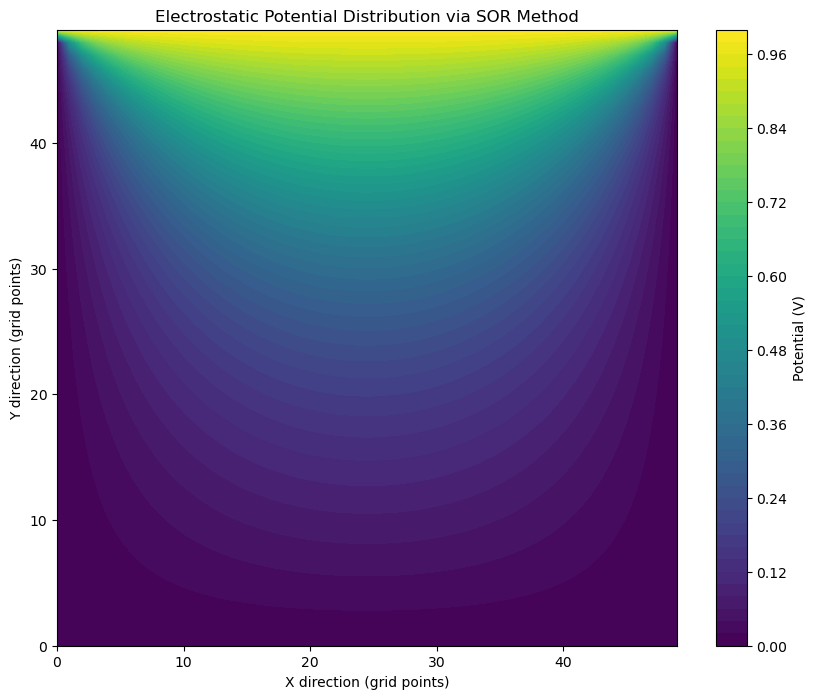

In [7]:
#3rd method
import numpy as np
import matplotlib.pyplot as plt

def calculate_error(old_potential, new_potential):
    errs = np.abs((new_potential - old_potential) / np.where(new_potential != 0, new_potential, 1))
    return np.sum(errs)

def SOR(potential, omega=1.5, kmax=10000, tol=1e-4):
    Ny, Nx = potential.shape
    for k in range(1, kmax + 1):
        old_potential = np.copy(potential)
        
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                # Using the most recently computed values
                new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                    potential[i, j+1] + potential[i, j-1])
                # Applying the SOR formula
                potential[i, j] = old_potential[i, j] + omega * (new_value - old_potential[i, j])
        
        # Calculate error using only interior points to check for convergence
        err = calculate_error(old_potential[1:-1, 1:-1], potential[1:-1, 1:-1])
        if err < tol:
            print(f"Converged after {k} iterations with a total error of {err}.")
            return potential
    
    print("Did not converge.")
    return potential

def visualize_potential(potential, title='Electrostatic Potential Distribution via SOR Method'):
    plt.figure(figsize=(10, 8))
    plt.contourf(potential, 50, cmap='viridis')
    plt.colorbar(label='Potential (V)')
    plt.title(title)
    plt.xlabel('X direction (grid points)')
    plt.ylabel('Y direction (grid points)')
    plt.show()

# Problem setup
L, H = 1.0, 1.0  # Pipe dimensions
Nx, Ny = 50, 50  # Grid size
V_0 = 1  # Boundary condition at the top

# Initialize potential array and set boundary conditions
potential = np.zeros((Ny, Nx))
potential[:, 0] = 0  # Left side
potential[:, -1] = 0  # Right side
potential[0, :] = 0  # Bottom side
potential[-1, :] = V_0  # Top side

# Solve using the SOR method
solved_potential = SOR(potential)

# Visualization
visualize_potential(solved_potential)


In [9]:
#Comparing the three methods
import numpy as np

def jacobi(potential, kmax=10000, tol=1e-4):
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        
        for i in range(1, Ny-1):
            for j in range(1, Nx-1):
                potential[i, j] = 0.25 * (old_potential[i+1, j] + old_potential[i-1, j] +
                                          old_potential[i, j+1] + old_potential[i, j-1])
        
        err = np.max(np.abs(potential - old_potential))
        if err < tol:
            return potential, k+1
    return potential, kmax

def gauss_seidel(potential, kmax=10000, tol=1e-4):
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        
        for i in range(1, Ny-1):
            for j in range(1, Nx-1):
                potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                          potential[i, j+1] + potential[i, j-1])
        
        err = np.max(np.abs(potential - old_potential))
        if err < tol:
            return potential, k+1
    return potential, kmax

def SOR(potential, omega=1.5, kmax=10000, tol=1e-4):
    Ny, Nx = potential.shape
    for k in range(kmax):
        old_potential = np.copy(potential)
        
        for i in range(1, Ny-1):
            for j in range(1, Nx-1):
                new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                    potential[i, j+1] + potential[i, j-1])
                potential[i, j] = potential[i, j] + omega * (new_value - potential[i, j])
        
        err = np.max(np.abs(potential - old_potential))
        if err < tol:
            return potential, k+1
    return potential, kmax

# Initialize your problem setup here
Ny, Nx = 50, 50  # Grid size for demonstration
V_0 = 1  # Boundary condition for demonstration
potential = np.zeros((Ny, Nx))
potential[-1, :] = V_0  # Apply top boundary condition as an example

# Solving with each method
solution_jacobi, iter_jacobi = jacobi(np.copy(potential))
solution_gs, iter_gs = gauss_seidel(np.copy(potential))
solution_sor, iter_sor = SOR(np.copy(potential), omega=1.5)

# Print the comparison
print(f"Jacobi iterations: {iter_jacobi}")
print(f"Gauss-Seidel iterations: {iter_gs}")
print(f"SOR iterations: {iter_sor} with omega = 1.5")



Jacobi iterations: 1037
Gauss-Seidel iterations: 697
SOR iterations: 329 with omega = 1.5


In [10]:
import time
# Solve using the Jacobi method
start_time = time.time()
solution_jacobi, iter_jacobi = jacobi(np.copy(potential))
jacobi_time = time.time() - start_time
print(f"Jacobi converged in {iter_jacobi} iterations, taking {jacobi_time:.4f} seconds.")

# Solve using the Gauss-Seidel method
start_time = time.time()
solution_gs, iter_gs = gauss_seidel(np.copy(potential))
gs_time = time.time() - start_time
print(f"Gauss-Seidel converged in {iter_gs} iterations, taking {gs_time:.4f} seconds.")

# Solve using the SOR method with omega = 1.5
start_time = time.time()
solution_sor, iter_sor = SOR(np.copy(potential), omega=1.5)
sor_time = time.time() - start_time
print(f"SOR converged in {iter_sor} iterations with omega = 1.5, taking {sor_time:.4f} seconds.")


Jacobi converged in 1037 iterations, taking 2.1249 seconds.
Gauss-Seidel converged in 697 iterations, taking 1.3869 seconds.
SOR converged in 329 iterations with omega = 1.5, taking 1.0244 seconds.


__Change potential and compare once again__

## Results and Discussion

_(What did you find when you carried out your methods? Some of your code related to presenting results/figures/data may be replicated from the methods section or may only be present in
this section.
All of the plots that you plan on using for your presentation should be present in this section)_

##  Conclusion and Perspectives

_(What did you learn from your results? 
What obstacles did you run into? 
What would you do differently next time? 
Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

1. 5.15: Poisson’s and Laplace’s Equations. (2020, April 2). Physics LibreTexts. https://phys.libretexts.org/Bookshelves/Electricity_and_Magnetism/Electromagnetics_I_(Ellingson)/05%3A_Electrostatics/5.15%3A_Poisson%E2%80%99s_and_Laplace%E2%80%99s_Equations
2.


**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
